In [22]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('Londres_Inglaterra.csv') 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95144 entries, 0 to 95143
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            95144 non-null  float64
 1   last_scraped                                  95144 non-null  object 
 2   source                                        95144 non-null  object 
 3   host_id                                       95144 non-null  int64  
 4   host_name                                     95137 non-null  object 
 5   host_since                                    95137 non-null  object 
 6   host_location                                 72911 non-null  object 
 7   host_is_superhost                             93396 non-null  object 
 8   host_neighbourhood                            46317 non-null  object 
 9   host_total_listings_count                     95137 non-null 

In [25]:
valores_nulos=data.isnull().sum()
valores_nulos

id                                                  0
last_scraped                                        0
source                                              0
host_id                                             0
host_name                                           7
host_since                                          7
host_location                                   22233
host_is_superhost                                1748
host_neighbourhood                              48827
host_total_listings_count                           7
host_has_profile_pic                                7
host_identity_verified                              7
neighbourhood                                   51680
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                       32400
bedrooms                                        12350
beds                        

In [26]:
data['price'] = (data['price'].replace('[\$,]', '', regex=True)).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_39732/360583944.py:1: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = (data['price'].replace('[\$,]', '', regex=True)).astype(float)


eliminar nulos

In [27]:
cuantitativas = data.select_dtypes(include=["float64", "int64"])
cualitativas = data.select_dtypes(include=["object"])

In [28]:
cuantitativas = cuantitativas.fillna(cuantitativas.mean())
cualitativas = cualitativas.fillna("Desconocido")

In [29]:
data1 = pd.concat([cuantitativas, cualitativas], axis=1)

In [30]:
valores_nulos=data1.isnull().sum()
valores_nulos

id                                              0
host_id                                         0
host_total_listings_count                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0


<Figure size 10000x100000 with 0 Axes>

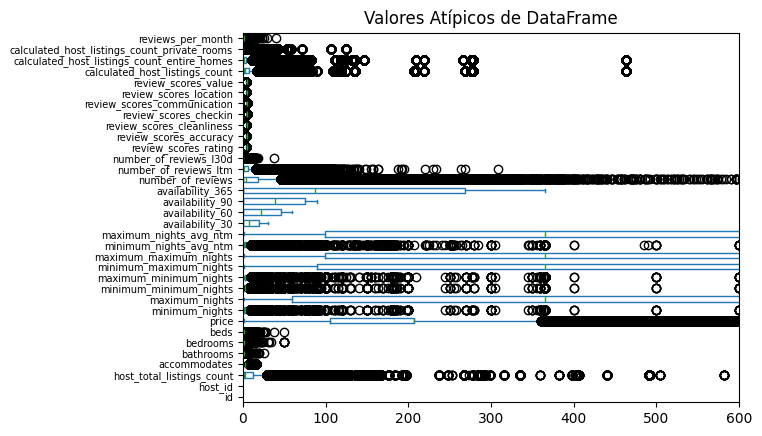

In [43]:
fig = plt.figure(figsize = (100,1000))
cuantitativas.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [32]:
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)


Limite superior permitido id                                              2.748075e+18
host_id                                         8.591024e+08
host_total_listings_count                       2.850000e+01
accommodates                                    7.000000e+00
bathrooms                                       1.881200e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           3.603540e+02
minimum_nights                                  8.500000e+00
maximum_nights                                  2.722500e+03
minimum_minimum_nights                          6.000000e+00
maximum_minimum_nights                          9.500000e+00
minimum_maximum_nights                          2.677500e+03
maximum_maximum_nights                          2.664000e+03
minimum_nights_avg_ntm                          9.250000e+00
maximum_nights_avg_ntm                          2.664000e+0

In [33]:
data2_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,5.622900e+04,216660,11.0,2.0,1.5,1.0,1.0,89.0,5.0,365.0,...,4.710000,4.670000,4.880000,4.790000,4.92000,4.710000,11.0,9.0,1.0,0.840000
1,6.297000e+04,336059,NaN,6.0,NaN,3.0,3.0,220.0,1.0,1125.0,...,4.640000,4.600000,4.800000,4.740000,4.63000,4.510000,1.0,1.0,0.0,1.050000
2,6.394800e+04,216660,11.0,2.0,1.0,1.0,1.0,88.0,3.0,730.0,...,4.620000,4.690000,4.870000,4.780000,4.91000,4.600000,11.0,9.0,1.0,1.060000
3,6.677200e+04,216660,11.0,2.0,1.0,1.0,1.0,75.0,3.0,1125.0,...,4.760000,4.760000,4.870000,4.770000,4.92000,4.670000,11.0,9.0,1.0,1.100000
4,6.919800e+04,345886,1.0,1.0,1.0,1.0,1.0,53.0,3.0,730.0,...,4.690000,4.770000,4.620000,4.850000,4.62000,4.230000,1.0,0.0,1.0,0.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,1.307780e+18,445228166,1.0,5.0,NaN,2.0,2.0,236.0,2.0,365.0,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615
95140,1.307790e+18,50878819,2.0,2.0,1.0,1.0,2.0,88.0,5.0,30.0,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615
95141,1.307790e+18,131418248,NaN,6.0,NaN,1.0,1.0,93.0,1.0,7.0,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,NaN,0.0,NaN,1.015615
95142,1.307790e+18,252350161,1.0,2.0,1.0,1.0,1.0,79.0,1.0,365.0,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,1.0,0.0,1.0,1.015615


In [34]:
valores_nulos=data2_iqr.isnull().sum()
valores_nulos

id                                                  0
host_id                                             0
host_total_listings_count                       15728
accommodates                                     4217
bathrooms                                       14792
bedrooms                                         4246
beds                                             6739
price                                            5832
minimum_nights                                   7531
maximum_nights                                      5
minimum_minimum_nights                          10364
maximum_minimum_nights                          11513
minimum_maximum_nights                             20
maximum_maximum_nights                             31
minimum_nights_avg_ntm                           9067
maximum_nights_avg_ntm                             31
availability_30                                     0
availability_60                                     0
availability_90             

In [35]:
data3_iqr=data2_iqr.copy()
data3_iqr=data2_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr

,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,5.622900e+04,216660,11.0,2.0,1.5,1.0,1.0,89.0,5.0,365.0,...,4.710000,4.670000,4.880000,4.790000,4.92000,4.710000,11.0,9.0,1.0,0.840000
1,6.297000e+04,336059,4.5,6.0,1.2,3.0,3.0,220.0,1.0,1125.0,...,4.640000,4.600000,4.800000,4.740000,4.63000,4.510000,1.0,1.0,0.0,1.050000
2,6.394800e+04,216660,11.0,2.0,1.0,1.0,1.0,88.0,3.0,730.0,...,4.620000,4.690000,4.870000,4.780000,4.91000,4.600000,11.0,9.0,1.0,1.060000
3,6.677200e+04,216660,11.0,2.0,1.0,1.0,1.0,75.0,3.0,1125.0,...,4.760000,4.760000,4.870000,4.770000,4.92000,4.670000,11.0,9.0,1.0,1.100000
4,6.919800e+04,345886,1.0,1.0,1.0,1.0,1.0,53.0,3.0,730.0,...,4.690000,4.770000,4.620000,4.850000,4.62000,4.230000,1.0,0.0,1.0,0.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,1.307780e+18,445228166,1.0,5.0,1.2,2.0,2.0,236.0,2.0,365.0,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615
95140,1.307790e+18,50878819,2.0,2.0,1.0,1.0,2.0,88.0,5.0,30.0,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615
95141,1.307790e+18,131418248,4.5,6.0,1.2,1.0,1.0,93.0,1.0,7.0,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,2.8,0.0,0.4,1.015615
95142,1.307790e+18,252350161,1.0,2.0,1.0,1.0,1.0,79.0,1.0,365.0,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,1.0,0.0,1.0,1.015615


In [36]:
Datos_limpios_london = pd.concat([cualitativas, data3_iqr], axis=1)
Datos_limpios_london

,last_scraped,source,host_name,host_since,host_location,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,neighbourhood,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,12/12/24,city scrape,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,t,t,Desconocido,...,4.710000,4.670000,4.880000,4.790000,4.92000,4.710000,11.0,9.0,1.0,0.840000
1,12/12/24,city scrape,Thomas,05/01/11,"Hamilton Parish, Bermuda",Desconocido,Mid-Beach,t,t,Neighborhood highlights,...,4.640000,4.600000,4.800000,4.740000,4.63000,4.510000,1.0,1.0,0.0,1.050000
2,12/12/24,city scrape,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,t,t,Desconocido,...,4.620000,4.690000,4.870000,4.780000,4.91000,4.600000,11.0,9.0,1.0,1.060000
3,11/12/24,city scrape,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,t,t,Desconocido,...,4.760000,4.760000,4.870000,4.770000,4.92000,4.670000,11.0,9.0,1.0,1.100000
4,11/12/24,city scrape,Alda,13/01/11,"London, United Kingdom",f,Desconocido,t,t,Neighborhood highlights,...,4.690000,4.770000,4.620000,4.850000,4.62000,4.230000,1.0,0.0,1.0,0.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,12/12/24,city scrape,Anastasiia,15/02/22,Desconocido,f,Desconocido,f,t,Neighborhood highlights,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615
95140,11/12/24,city scrape,Susan,09/12/15,"London, United Kingdom",f,Desconocido,t,t,Desconocido,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615
95141,12/12/24,city scrape,Steve,22/05/17,"London, United Kingdom",f,Desconocido,t,t,Desconocido,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,2.8,0.0,0.4,1.015615
95142,11/12/24,city scrape,Ursula,31/03/19,"England, United Kingdom",f,Desconocido,f,f,Desconocido,...,4.735425,4.658457,4.794925,4.819357,4.73376,4.623557,1.0,0.0,1.0,1.015615


In [37]:
valores_nulos=Datos_limpios_london.isnull().sum()
valores_nulos

last_scraped                                    0
source                                          0
host_name                                       0
host_since                                      0
host_location                                   0
host_is_superhost                               0
host_neighbourhood                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood                                   0
property_type                                   0
room_type                                       0
has_availability                                0
first_review                                    0
last_review                                     0
instant_bookable                                0
id                                              0
host_id                                         0
host_total_listings_count                       0
accommodates                                    0


In [38]:
Datos_limpios_london.to_csv("Datos_limpios_London1.csv")